<a href="https://colab.research.google.com/github/CyberBantu/Analise_1746_Dados_Marginais/blob/main/RJ_indice_pluviometrico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
pip install shapely

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [152]:
pip install geobr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [155]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [157]:
pip install --upgrade shapely

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 13.6 MB/s eta 0:00:00
  Attempting uninstall: shapely
    Found existing installation: Shapely 1.8.5.post1
    Uninstalling Shapely-1.8.5.post1:
      Successfully uninstalled Shapely-1.8.5.post1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
geobr 0.2.0 requires shapely<2.0.0,>=1.7.0, but you have shapely 2.0.1 which is incompatible.


In [158]:
import geobr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [99]:
df = pd.read_csv('dados_completos.csv', sep= ';')
df.head()

,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,datahora,valorMedida
0,RIO DE JANEIRO,330455701A,RJ,Glória,"-22,915000","-43,176000",2022-04-01T00:50:00Z,"0,00"
1,RIO DE JANEIRO,330455701A,RJ,Glória,"-22,915000","-43,176000",2022-04-01T01:00:00Z,"0,39"
2,RIO DE JANEIRO,330455701A,RJ,Glória,"-22,915000","-43,176000",2022-04-01T01:10:00Z,"0,39"
3,RIO DE JANEIRO,330455701A,RJ,Glória,"-22,915000","-43,176000",2022-04-01T01:20:00Z,"1,77"
4,RIO DE JANEIRO,330455701A,RJ,Glória,"-22,915000","-43,176000",2022-04-01T01:30:00Z,"2,75"


In [100]:
df.sort_values(by = 'valorMedida', ascending = False)

,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,datahora,valorMedida
78489,RIO DE JANEIRO,330455704A,RJ,Praça Seca,"-22,896000","-43,352000",2022-01-29T02:40:00Z,"96,72"
7327,RIO DE JANEIRO,330455716A,RJ,CIEP Samuel Wainer,"-22,921000","-43,227000",2022-04-01T01:20:00Z,"9,80"
13041,RIO DE JANEIRO,330455725A,RJ,Vigário Geral,"-22,813100","-43,310100",2022-04-30T00:40:00Z,"9,80"
73839,RIO DE JANEIRO,330455733A,RJ,Pilares,"-22,875000","-43,299000",2022-02-06T18:40:00Z,"9,80"
168708,RIO DE JANEIRO,330455713A,RJ,Padre Miguel,"-22,868900","-43,450700",2022-11-24T06:50:00Z,"9,80"
...,...,...,...,...,...,...,...,...
85746,RIO DE JANEIRO,330455716A,RJ,CIEP Samuel Wainer,"-22,921000","-43,227000",2022-01-06T16:50:00Z,"0,00"
85747,RIO DE JANEIRO,330455716A,RJ,CIEP Samuel Wainer,"-22,921000","-43,227000",2022-01-06T17:50:00Z,"0,00"
85748,RIO DE JANEIRO,330455716A,RJ,CIEP Samuel Wainer,"-22,921000","-43,227000",2022-01-06T18:50:00Z,"0,00"
85749,RIO DE JANEIRO,330455716A,RJ,CIEP Samuel Wainer,"-22,921000","-43,227000",2022-01-06T19:50:00Z,"0,00"


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218781 entries, 0 to 218780
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   municipio    218781 non-null  object
 1   codEstacao   218781 non-null  object
 2   uf           218781 non-null  object
 3   nomeEstacao  218781 non-null  object
 4   latitude     218781 non-null  object
 5   longitude    218781 non-null  object
 6   datahora     218781 non-null  object
 7   valorMedida  218781 non-null  object
dtypes: object(8)
memory usage: 13.4+ MB


In [101]:
df['datahora'] = df['datahora'].str.split('T').str[0]

In [103]:
df.sort_values(by = 'valorMedida', ascending = False)

,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,datahora,valorMedida
78489,RIO DE JANEIRO,330455704A,RJ,Praça Seca,"-22,896000","-43,352000",2022-01-29,"96,72"
7327,RIO DE JANEIRO,330455716A,RJ,CIEP Samuel Wainer,"-22,921000","-43,227000",2022-04-01,"9,80"
13041,RIO DE JANEIRO,330455725A,RJ,Vigário Geral,"-22,813100","-43,310100",2022-04-30,"9,80"
73839,RIO DE JANEIRO,330455733A,RJ,Pilares,"-22,875000","-43,299000",2022-02-06,"9,80"
168708,RIO DE JANEIRO,330455713A,RJ,Padre Miguel,"-22,868900","-43,450700",2022-11-24,"9,80"
...,...,...,...,...,...,...,...,...
85746,RIO DE JANEIRO,330455716A,RJ,CIEP Samuel Wainer,"-22,921000","-43,227000",2022-01-06,"0,00"
85747,RIO DE JANEIRO,330455716A,RJ,CIEP Samuel Wainer,"-22,921000","-43,227000",2022-01-06,"0,00"
85748,RIO DE JANEIRO,330455716A,RJ,CIEP Samuel Wainer,"-22,921000","-43,227000",2022-01-06,"0,00"
85749,RIO DE JANEIRO,330455716A,RJ,CIEP Samuel Wainer,"-22,921000","-43,227000",2022-01-06,"0,00"


In [104]:
df['datahora'] = pd.to_datetime(df['datahora'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218781 entries, 0 to 218780
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   municipio    218781 non-null  object        
 1   codEstacao   218781 non-null  object        
 2   uf           218781 non-null  object        
 3   nomeEstacao  218781 non-null  object        
 4   latitude     218781 non-null  object        
 5   longitude    218781 non-null  object        
 6   datahora     218781 non-null  datetime64[ns]
 7   valorMedida  218781 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 13.4+ MB


#### Criando agrupamento dos dados por Estação

In [105]:
df.head()

,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,datahora,valorMedida
0,RIO DE JANEIRO,330455701A,RJ,Glória,"-22,915000","-43,176000",2022-04-01,"0,00"
1,RIO DE JANEIRO,330455701A,RJ,Glória,"-22,915000","-43,176000",2022-04-01,"0,39"
2,RIO DE JANEIRO,330455701A,RJ,Glória,"-22,915000","-43,176000",2022-04-01,"0,39"
3,RIO DE JANEIRO,330455701A,RJ,Glória,"-22,915000","-43,176000",2022-04-01,"1,77"
4,RIO DE JANEIRO,330455701A,RJ,Glória,"-22,915000","-43,176000",2022-04-01,"2,75"


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218781 entries, 0 to 218780
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   municipio    218781 non-null  object        
 1   codEstacao   218781 non-null  object        
 2   uf           218781 non-null  object        
 3   nomeEstacao  218781 non-null  object        
 4   latitude     218781 non-null  object        
 5   longitude    218781 non-null  object        
 6   datahora     218781 non-null  datetime64[ns]
 7   valorMedida  218781 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 13.4+ MB


In [107]:
# Tratando os dados
# O valor estava como texto e com . ou inves de , 
df["valorMedida"] = df["valorMedida"].str.replace(",", ".")
# Tranformar em numerico toda a coluna
df["valorMedida"] = pd.to_numeric(df["valorMedida"])


In [108]:
df.head(3)

,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,datahora,valorMedida
0,RIO DE JANEIRO,330455701A,RJ,Glória,"-22,915000","-43,176000",2022-04-01,0.00
1,RIO DE JANEIRO,330455701A,RJ,Glória,"-22,915000","-43,176000",2022-04-01,0.39
2,RIO DE JANEIRO,330455701A,RJ,Glória,"-22,915000","-43,176000",2022-04-01,0.39


* Decidi por observar valores outliers na coluna valorMedida, este sendo cortados todos os valores acima de 400 mm

In [111]:
df.sort_values(by = 'valorMedida', ascending = False).head(15)

,municipio,codEstacao,uf,nomeEstacao,latitude,longitude,datahora,valorMedida
146214,RIO DE JANEIRO,330455704A,RJ,Praça Seca,"-22,896000","-43,352000",2022-03-20,8848.52
58466,RIO DE JANEIRO,330455704A,RJ,Praça Seca,"-22,896000","-43,352000",2022-02-25,4879.32
146206,RIO DE JANEIRO,330455704A,RJ,Praça Seca,"-22,896000","-43,352000",2022-03-11,2914.33
146219,RIO DE JANEIRO,330455704A,RJ,Praça Seca,"-22,896000","-43,352000",2022-03-24,1782.25
146216,RIO DE JANEIRO,330455704A,RJ,Praça Seca,"-22,896000","-43,352000",2022-03-21,1401.46
58452,RIO DE JANEIRO,330455704A,RJ,Praça Seca,"-22,896000","-43,352000",2022-02-06,1304.75
1862,RIO DE JANEIRO,330455704A,RJ,Praça Seca,"-22,896000","-43,352000",2022-04-03,395.05
78476,RIO DE JANEIRO,330455704A,RJ,Praça Seca,"-22,896000","-43,352000",2022-01-28,387.50
78581,RIO DE JANEIRO,330455704A,RJ,Praça Seca,"-22,896000","-43,352000",2022-01-30,356.03
58440,RIO DE JANEIRO,330455704A,RJ,Praça Seca,"-22,896000","-43,352000",2022-02-04,195.32


In [112]:
df = df[df['valorMedida'] < 400].sort_values(by='valorMedida', ascending=False)

In [113]:
df['valorMedida'].max()

395.05

In [137]:
# Fazendo o agrupamento
estacao = df.groupby(["nomeEstacao", 'longitude', 'latitude'])["valorMedida"].sum()

In [138]:
estacao = estacao.reset_index()
estacao 

,nomeEstacao,longitude,latitude,valorMedida
0,Abolição,"-43,297753","-22,885906",902.20
1,Alto da Boa Vista,"-43,296500","-22,966600",2658.60
2,Andaraí,"-43,250000","-22,930000",932.00
3,CIEP Dr. João Ramos de Souza,"-43,203000","-22,796000",1263.20
4,CIEP Samuel Wainer,"-43,227000","-22,921000",1097.20
5,Catete,"-43,176000","-22,923000",493.80
6,Defesa Civil Santa Cruz,"-43,676000","-22,894000",1438.20
7,Glória,"-43,176000","-22,915000",766.08
8,Higienópolis,"-43,265000","-22,869000",1254.40
9,Ilha de Paquetá,"-43,108400","-22,761300",1363.60


* Indice Pluviometrico do ano por Estação no Rio de Janeiro 
-- Com base em coleta de dados do CEMADEN

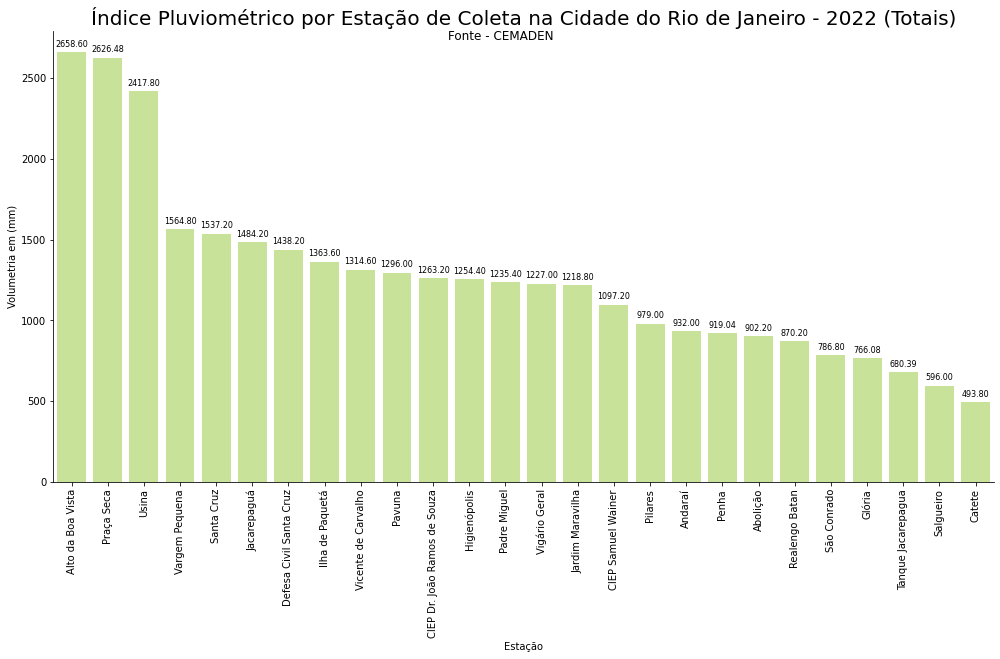

In [135]:
# Plotando o grafico de Indice por ano
g1_estacao = sns.catplot(data = estacao,
            kind = 'bar',
            y = 'valorMedida',
            x = "nomeEstacao",
            height=7, # altura da figura em polegadas
            aspect=2, # largura da figura em relação à altura,
            color = '#ccee8d',
            order=estacao.sort_values('valorMedida', ascending = False)['nomeEstacao']
            )
plt.xticks(rotation = 90)
plt.xlabel('Estação')
plt.ylabel('Volumetria em (mm)')
plt.title('Índice Pluviométrico por Estação de Coleta na Cidade do Rio de Janeiro - 2022 (Totais)', size = 20)
plt.suptitle('Fonte - CEMADEN')

# Criando os rotulos para o Grafico
for i, bar in enumerate(g1_estacao.ax.patches):
    g1_estacao.ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                   ha='center', va='center', fontsize=8, color='black', xytext=(0, 8),
                   textcoords='offset points')

%md
##### Criação do mapa com os indices


In [162]:
RJ = geobr.read_state(code_state="RJ", year=2018)
RJ

,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,33.0,RJ,Rio De Janeiro,3.0,Sudeste,"MULTIPOLYGON (((-41.78720 -22.76892, -41.78445..."


In [164]:
df["latitude"] = df["latitude"].str.replace(",", ".")
# Tranformar em numerico toda a coluna
df["latitude"] = pd.to_numeric(df["latitude"])


df["longitude"] = df["longitude"].str.replace(",", ".")
# Tranformar em numerico toda a coluna
df["longitude"] = pd.to_numeric(df["longitude"])

In [166]:
estacao["latitude"] = estacao["latitude"].str.replace(",", ".")
# Tranformar em numerico toda a coluna
estacao["latitude"] = pd.to_numeric(estacao["latitude"])


estacao["longitude"] = estacao["longitude"].str.replace(",", ".")
# Tranformar em numerico toda a coluna
estacao["longitude"] = pd.to_numeric(estacao["longitude"])

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


AttributeError: ignored

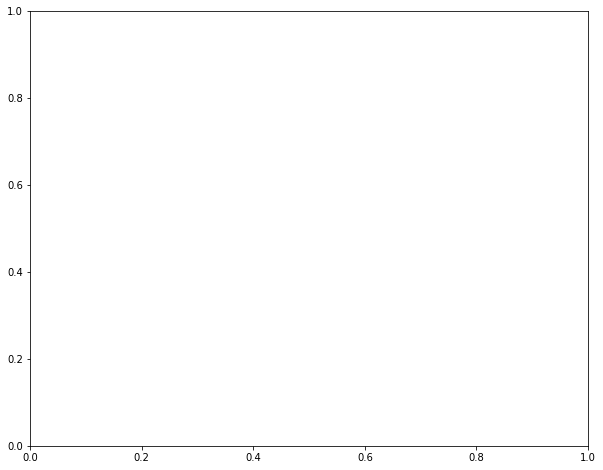

In [171]:
# dados de estações
estacao.plot.scatter(y = 'latitude', x = 'longitude', size = 'valorMedida' , figsize = (10,8))